# 繪製台灣銀行近半年台幣兌美金、人民幣及港幣的匯率走勢

## 匯入需要的模組

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import matplotlib.dates as mdates

## 匯入字型

In [2]:
mpl.rc('font', family='Simhei')

## 匯入半年內匯率資料

註：由於台銀的資料設定，每天所取樣的"半年"資料會往前推移

In [3]:
df_USD = pd.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')
df_CNY = pd.read_html('https://rate.bot.com.tw/xrt/quote/l6m/CNY')
df_HKD = pd.read_html('https://rate.bot.com.tw/xrt/quote/l6m/HKD')

## 把表格不要的部分清乾淨

In [4]:
df_U1 = df_USD[0]
df_C1 = df_CNY[0]
df_H1 = df_HKD[0]

## 先隨意命名標題，方便清理

In [5]:
df_U1.columns = [1,2,3,4,5,6,7]
df_C1.columns = [1,2,3,4,5,6,7]
df_H1.columns = [1,2,3,4,5,6,7]

## 僅需保留前三行，剩餘的清掉

In [6]:
df_U2 = df_U1.drop([4,5,6,7],axis=1)
df_C2 = df_C1.drop([4,5,6,7],axis=1)
df_H2 = df_H1.drop([4,5,6,7],axis=1)

## 把原始標題還原回去

In [7]:
df_U2.columns = ['掛牌日期','幣別','買入']
df_C2.columns = ['掛牌日期','幣別','買入']
df_H2.columns = ['掛牌日期','幣別','買入']

## 依照日期排序

In [8]:
df_U3 = df_U2.sort_values(by='掛牌日期')
df_C3 = df_C2.sort_values(by='掛牌日期')
df_H3 = df_H2.sort_values(by='掛牌日期')

## 設定好繪製時的x,y座標

In [9]:
time = df_U3['掛牌日期']
listU = df_U3['買入']
listC = df_C3['買入']
listH = df_H3['買入']

In [10]:
xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in time]
ysU = listU
ysC = listC
ysH = listH

## 分別繪製美金、人民幣、港幣的匯率走勢

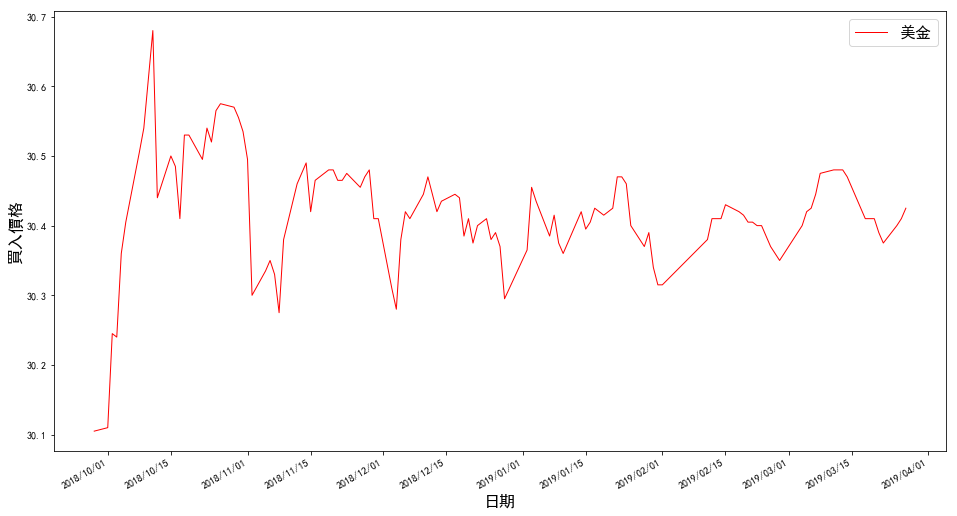

In [51]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator([1,15]))
plt.plot(xs,ysU,label="美金",color="red",linewidth=1)
plt.gcf().autofmt_xdate()
plt.xlabel('日期',fontsize=16)
plt.ylabel('買入價格',fontsize=16)
plt.legend(loc=1,fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16,9)

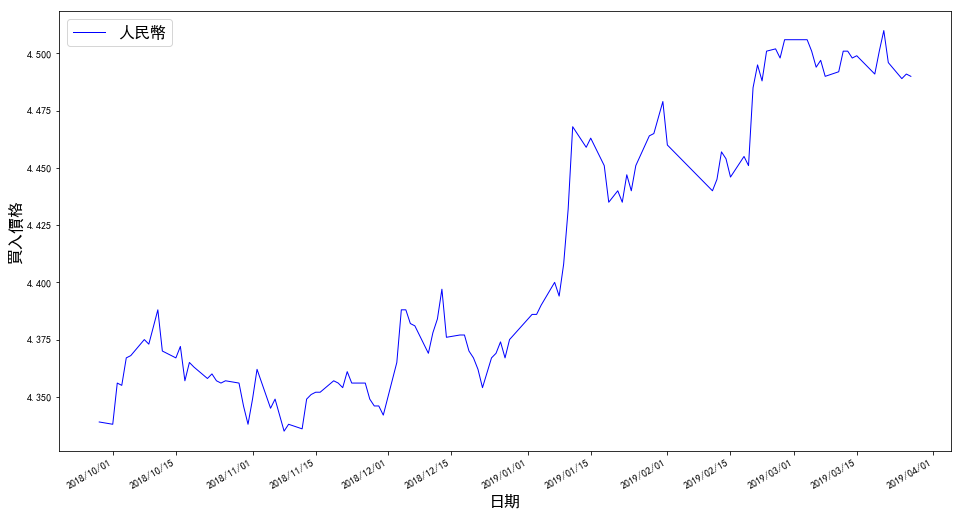

In [49]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator([1,15]))
plt.plot(xs,ysC,label="人民幣",color="blue",linewidth=1)
plt.gcf().autofmt_xdate()
plt.xlabel('日期',fontsize=16)
plt.ylabel('買入價格',fontsize=16)
plt.legend(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16,9)

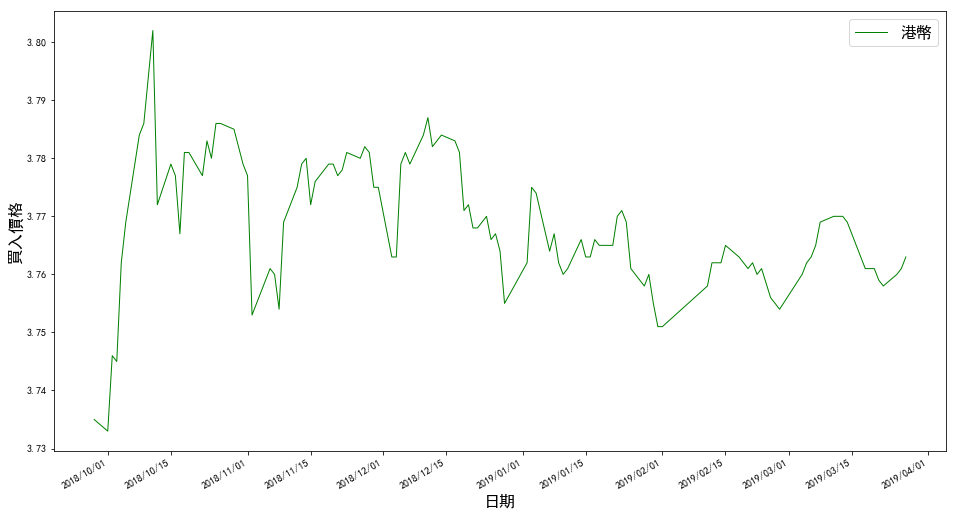

In [48]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator([1,15]))
plt.plot(xs,ysH,label="港幣",color="green",linewidth=1)
plt.gcf().autofmt_xdate()
plt.xlabel('日期',fontsize=16)
plt.ylabel('買入價格',fontsize=16)
plt.legend(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16,9)

## 從圖中可以發現，美金跟港幣的匯率走勢圖幾乎長的一樣，這是因為1983年香港開始實施的聯繫匯率制度，將港元控制在7.75至7.85兌1美元。我們試著將美金匯率圖與港幣匯率圖疊在一起比較看看

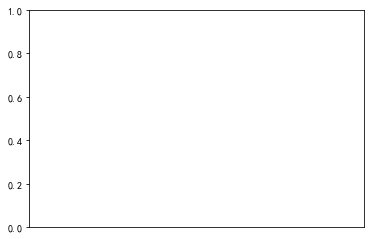

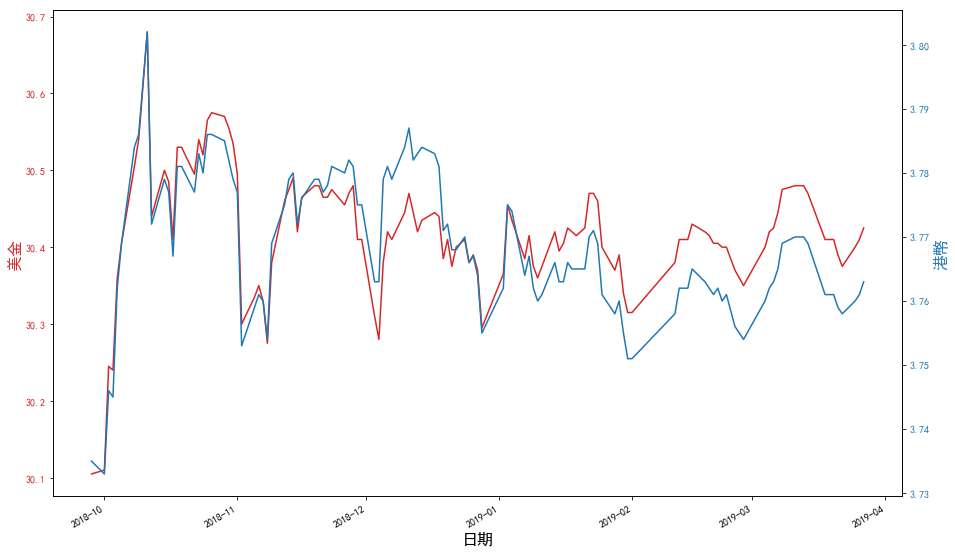

In [61]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator([1,15]))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('日期',fontsize=16)
ax1.set_ylabel('美金', color=color,fontsize=16)
ax1.plot(xs, ysU, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('港幣', color=color,fontsize=16)
ax2.plot(xs, ysH, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()=
plt.gcf().autofmt_xdate()
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()


## 從圖中可以發現10月初時，台幣無論是兌美金還是兌港幣都是貶值，這是因為美中貿易戰等利空，導致多數主要貨幣對美金均為貶值（但港幣有聯匯制度不太受影響）
## 接著我們再同時比較美金與人民幣的匯率

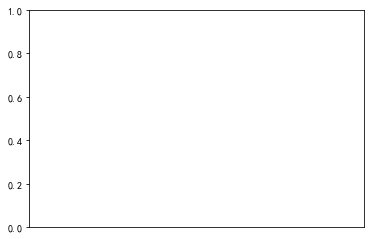

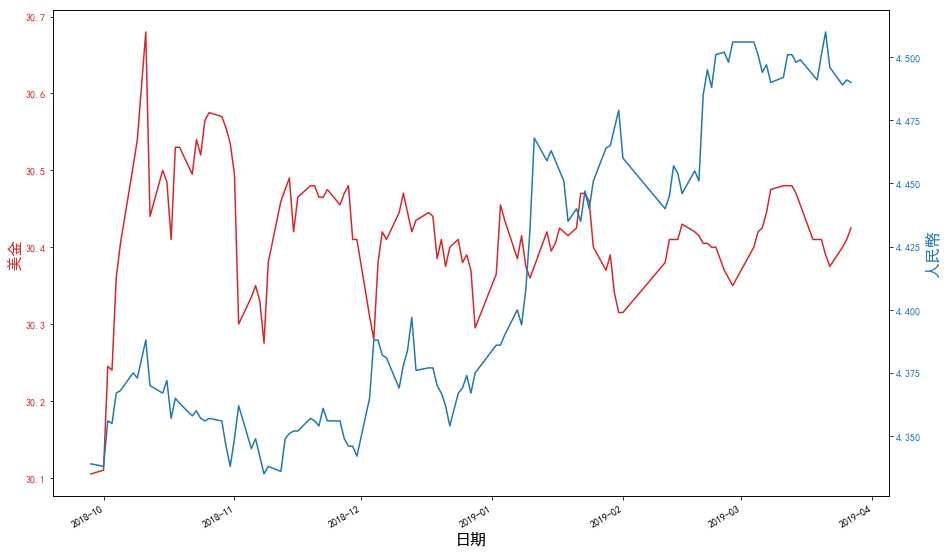

In [65]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator([1,15]))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('日期',fontsize=16)
ax1.set_ylabel('美金', color=color,fontsize=16)
ax1.plot(xs, ysU, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('人民幣', color=color,fontsize=16)
ax2.plot(xs, ysC, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.gcf().autofmt_xdate()
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

## 可以發現10月時人民幣對美金確實是貶值，但最近又強勢回升

參考資料
1. 台銀歷史匯率：https://rate.bot.com.tw/xrt/history
2. 香港聯匯制度：https://wiki.mbalib.com/zh-tw/%E8%81%94%E7%B3%BB%E6%B1%87%E7%8E%87%E5%88%B6%E5%BA%A6
3. 2018/10 美金升值：https://www.ettoday.net/news/20181009/1277257.htm
4. 2019/03 人民幣升值：http://www.xinhuanet.com/finance/2019-03/22/c_1210089130.htm